# T-Test one Pair

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import scale

In [3]:
import researchpy as rp

In [4]:
import matplotlib.pyplot as plt

In [5]:
from scipy import stats

In [6]:
bike_data=pd.read_csv('Downloads/day.csv')

In [7]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
bike_data.drop(columns='instant',axis=1,inplace=True)

#interested columns for us are working day and cnt for ttest1independent test

0 dentoe no working day and 1 for working day

temperature is continuous values

cnt is number of bike shared

weather situation 1- Spring 2-Summer 3-Fall 4- winter

In [9]:
bike_data=bike_data[['season','mnth','holiday','workingday','weathersit','temp','cnt']]

In [10]:
bike_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [11]:
bike_data.to_csv('RefinedData.csv',index=False)

In [13]:
bike_data.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
bike_data.weathersit.unique() #1- clear few cloud 2. Misty Cloud 3. Light Shower rain thunderstorm

array([2, 1, 3], dtype=int64)

In [15]:
bike_data.temp.describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

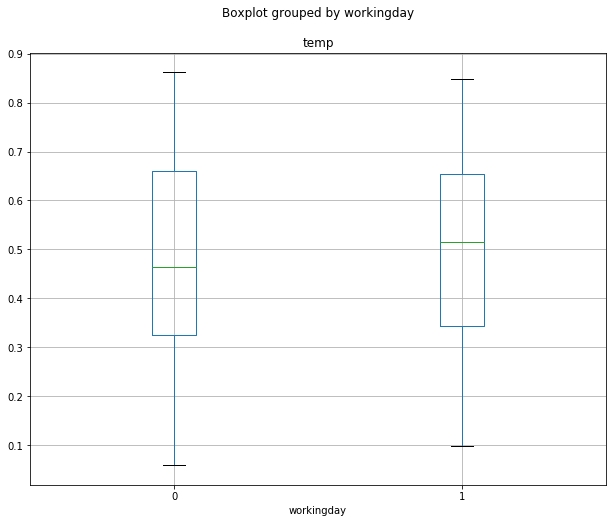

In [16]:
bike_data.boxplot(column='temp',figsize=(10,8),by='workingday')

In [17]:
bike_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


In [18]:
sample01=bike_data[bike_data['workingday']==0]
sample02=bike_data[bike_data['workingday']==1]


In [19]:
sample01.shape,sample02.shape

((231, 7), (500, 7))

In [36]:
sample01.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
7,1,1,0,0,2,0.165000,959
8,1,1,0,0,1,0.138333,822
14,1,1,0,0,2,0.233333,1248


In [20]:
stats.levene(sample01['cnt'],sample02['cnt'])#to check the variance of the group are same, there is null hypothesis that
                                             # there is  significant difference in variance (SD) of two group levene test
                                            # is f-Test, here p value is less than 0.05 so there is difference is variance, equal
                                            # variance not assumed

LeveneResult(statistic=4.345365092777056, pvalue=0.037457323247039445)

In [35]:
stats.ttest_ind(sample01['cnt'],sample02['cnt'])#reject the null hypothesis that it has not significant difference 
                                                #in mean of two groups i.e no effect on no. of bikes shared on the working day
                                               #variable

Ttest_indResult(statistic=-1.6543102137118633, pvalue=0.09849496160024915)

In [37]:
descriptive,results=rp.ttest(sample01['cnt'],sample02['cnt'])

In [38]:
results

,Independent t-test,results
0,Difference (cnt - cnt) =,-254.6512
1,Degrees of freedom =,729.0000
2,t =,-1.6543
3,Two side test p value =,0.0985
4,Difference < 0 p value =,0.0492
5,Difference > 0 p value =,0.9508
6,Cohen's d =,-0.1316
7,Hedge's g =,-0.1315
8,Glass's delta =,-0.1241
9,r =,0.0612


# to check whether temperature of a day affect on the number of bike shared

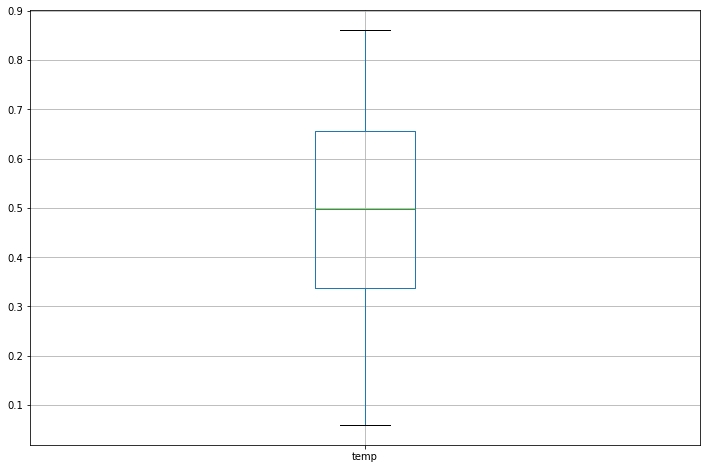

In [42]:
bike_data.boxplot(column='temp',figsize=(12,8))

In [43]:
import seaborn as sns

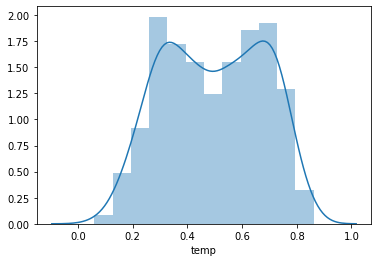

In [44]:
sns.distplot(bike_data['temp'])

In [45]:
bike_data['temp_cat']=\
                    bike_data['temp']>bike_data['temp'].mean()

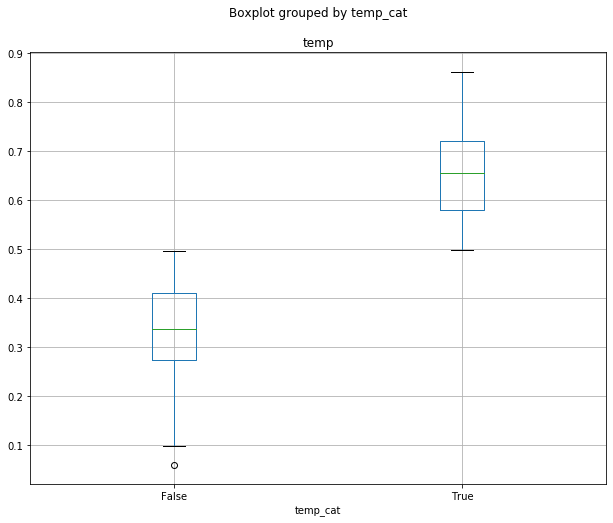

In [50]:
bike_data.boxplot(column='temp',by='temp_cat',figsize=(10,8))

In [51]:
bike_data.groupby('temp_cat')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_cat,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


In [52]:
sample01=bike_data[bike_data['temp_cat']==True]

In [53]:
sample02=bike_data[bike_data['temp_cat']==False]

In [54]:
sample01.shape,sample02.shape

((367, 8), (364, 8))

In [57]:
sample01.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_cat
48,1,2,0,1,1,0.521667,2927,True
76,1,3,0,1,1,0.540000,3239,True
93,2,4,0,1,1,0.573333,3115,True
100,2,4,0,1,2,0.595652,3348,True
101,2,4,0,1,2,0.502500,2034,True


In [58]:
#as the number of rows are not same so drop the rows

In [59]:
sample01=sample01.sample(364)

In [60]:
sample01.shape

(364, 8)

In [61]:
#test the prerequisite for t-test

In [63]:
stats.levene(sample01['cnt'],sample02['cnt'])#variance of two groups are different

LeveneResult(statistic=4.723545595266054, pvalue=0.03007489886207)

In [64]:
stats.ttest_ind(sample01['cnt'],sample02['cnt'])#accept the null hypothesis means are statisitically different on count

Ttest_indResult(statistic=18.874085669545224, pvalue=5.9324910058514386e-65)

In [65]:
descriptive,results=rp.ttest(sample01['cnt'],sample02['cnt'])

In [66]:
results

,Independent t-test,results
0,Difference (cnt - cnt) =,2221.2830
1,Degrees of freedom =,726.0000
2,t =,18.8741
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.3990
7,Hedge's g =,1.3976
8,Glass's delta =,1.5041
9,r =,0.5737
